In [1]:
from Model2 import RiverDeltaModel
import matplotlib.pyplot as plt
import networkx as nx
import warnings 
import matplotlib.lines as mlines

c:\Users\sjuul\anaconda3\envs\afstuderen2025\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
warnings.simplefilter("ignore")

model = RiverDeltaModel()

pos = nx.spring_layout(model.G)

for j in range(300):
    model.step()

NameError: name 'salinity_influence_neighbours' is not defined

In [ ]:
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data = agent_data.xs(60, level="Step")
agent_data 

,Age,Salinity,Savings,Loan_size,maximum_debt,income,abilities,current_crop,New crop
AgentID,,,,,,,,,
1,"[0, 1, 6, 7, 25, 28]",1.050616,16698.816670,0.0,5134.741602,5555.346754,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
2,"[1, 4, 6, 29, 30]",1.402282,15133.567821,0.0,3974.057332,4020.791127,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
3,"[4, 6, 7, 10, 12, 43, 49, 56]",0.716400,21918.151185,0.0,6442.829586,8930.380035,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
4,"[8, 9, 42, 43, 66]",1.246650,19078.648532,0.0,7580.586350,10890.858809,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
5,"[3, 4, 7, 34, 35, 68]",2.701845,19446.438590,0.0,10913.104010,14445.269837,"[{'strategy': 'Rice', 'FA': 1, 'IA': 1, 'TA': ...",Rice,Rice
...,...,...,...,...,...,...,...,...,...
1046,0,NaN,NaN,NaN,NaN,NaN,None,None,None
1047,0,NaN,NaN,NaN,NaN,NaN,None,None,None
1048,0,NaN,NaN,NaN,NaN,NaN,None,None,None


### PLOT AGENTS ON THE MAP

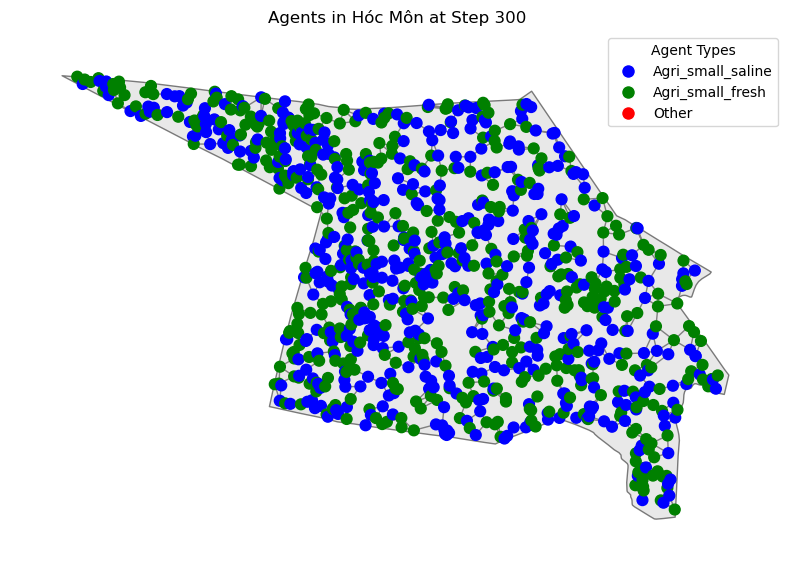

In [ ]:
import matplotlib.lines as mlines
from Agents2 import Agri_farmer

def plot_network(ax, model):
    ax.clear()

    # Plot district map, based on district polygon we defined earlier
    model.polygon_districts.plot(ax=ax, facecolor="lightgray", edgecolor="black", alpha=0.5)

    # Get the positions of the nodes
    pos = nx.get_node_attributes(model.G, 'pos')

    # Each farmer agent should be represented by a node. A dictionary is created where each node id will correspond with an agent
    node_to_agent = {}
    for agent in model.agents:
        if isinstance(agent, Agri_farmer): # Only farmer agents need to be plotted
            node_to_agent[agent.node_id] = agent

    # Give each node a color, based on their agent type
    colors = []
    for node_id in model.G.nodes():
        agent = node_to_agent.get(node_id)  
        if agent:
            if agent.agent_type == "Agri_small_saline":
                colors.append('blue')
            elif agent.agent_type == "Agri_small_fresh":
                colors.append('green')
            else:
                colors.append('red')  
        else:
            colors.append("gray")  # something went wrong here, so the node is then gray

    # Add legend
    blue_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Agri_small_saline')
    green_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='green', markersize=10, label='Agri_small_fresh')
    red_patch = mlines.Line2D([], [], marker='o', color='w', markerfacecolor='red', markersize=10, label='Other')
    ax.legend(handles=[blue_patch, green_patch, red_patch], loc='upper right', title='Agent Types')

    # Plot netwerk
    nx.draw(model.G, pos, node_color=colors, node_size=60, edge_color="gray", ax=ax)
    ax.set_title(f"Agents in {model.district} at Step {model.steps}", fontsize=12)

# Call function above to plot the map
fig, ax = plt.subplots(figsize=(10, 10))
plot_network(ax, model)
plt.show()
